In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_HEOCA_revision_lennard.halle/adata_leiden.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 225487 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined', 'leiden_res_2', 'leiden_res2_l2', 'leiden_res_5', 'leiden_res5_l2', 'leiden_res_10', 'leiden_res10_l2', 'leiden_res2_l3', 'leiden_res5_l3', 'leiden_res10_l3'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'leiden_res10_l3_colors', 'leiden_res2_l3_colors', 'leiden_res5_l3_colors', 'level_3_colors', 'neighbors'
    obsm: 'X_scPoli', 'X_umap'
    

In [4]:
# Change values in the "derive" column based on the condition in the "publication" column of Miller_2020 to correctly annotate
adata.obs.loc[adata.obs['publication'] == "Miller_DevCell_2020", 'derive'] = "FSC"


In [5]:
cell_type_colors = {
    "biliarysystem": "#A73030",
    "intestine": "#91D1C2",
    "liver": "#8F7700",
    "lung": "#F39B7F",
    "pancreas": "#DC0000",
    "prostate": "#4A6990",
    "salivarygland": "#3B3B3B",
    "stomach": "#B09C85",
    "thyroid": "#7E6148",
    "epithelial": "#0073C2",
    "mesenchymal": "#A3E3AF",
    "stromal": "#A3E3AF",
    "neural": "#111111",
    "endothelial": "#CD534C",
    "immune": "#C251A1",
    "stem cells": "#777777",
    "enterocytes": "#225805",
    "stromal 2 (NPY)": "#E4B974",
    "colonocytes": "#FFB300",
    "goblet cells": "#8E3101",
    "cycling stromal cells": "#47EDD1",
    "Interstitial cells of Cajal (ICC)": "#F47A92",
    "smooth muscle cells (SMC)": "#2D62A3",
    "mesoderm 1 (HAND1)": "#9106EB",
    "pericytes": "#573794",
    "Microfold cells": "#F82745",
    "mesoderm 2 (ZEB2)": "#6435E0",
    "schwann cell": "#027FFE",
    "basal cells": "#E68A54",
    "ciliated cells": "#1C15BC",
    "enteroendocrine cells": "#F7DC6F",
    "mesothelial cells": "#7DCEA0",
    "neuron": "#111111",
    "tuft cells": "#9E018A",
    "cycling endothelial cells": "#BDFD0B",
    "stromal 1 (ADAMDEC1)": "#B22760",
    "lymphatic endothelium": "#2BF49F",
    "paneth cells": "#CB9348",
    "biliary cells": "#43A047",
    "mLTo cells": "#46ADAF",
    "BEST4+ epithelial": "#870F0F",
    "club cells": "#795548",
    "alveolar type 1 (AT1) cells": "#85C1E9",
    "stellate cells": "#EAD9D5",
    "thyrocytes": "#CDDC39",
    "pit cells": "#8D6E63",
    "ductal cells": "#6300B5",
    "pancreatic cells": "#012824",
    "neck cells": "#A347FB",
    "neuroendocrine cells": "#CE35E6",
    "cardiovascular cells": "#FE52CF",
    "alveolar type 2 (AT2) cells": "#F8E347",
    "chief cells": "#6C6F15",
    "hepatocytes": "#7788CD",
    "beta cells": "#0DC290",
    "acinar cells": "#3CAA0A",
    "kupffer cells": "#08F8EB",
    "stromal 3 (C7)": "#5DEB2E",
    "stromal 4 (MMP1)": "#D6A5FA",
    "arterial": "#AB1EBA",
    "capillary": "#054DDC",
    "mLN stromal": "#854F49",
    "portal endothelial": "#3A0E43",
    "central endothelial": "#37D160",
    "airway secretory cells": "#A8BADE",
    "epsilon cells": "#C76CDE",
    "alpha cells": "#D7FDFD",
    "delta cells": "#8BE46E",
    "luminal cells": "#E68FC6",
    "quiescent cells": "#6EA3FA",
    "fibroblast": "#3E35B7",
    "mature enterocytes": "#225805",
    "mature colonocytes": "#537F88",
    "myofibroblasts": "#F2D71E",
    "enterocyte precursors": "#12401F",
    "MUC2- goblet cells": "#5536D5",
    "immature pericytes": "#D2B993",
    "M/X cells": "#DED8CE",
    "RGS5 pericytes": "#CC4285",
    "younger goblet cells": "#C3EACA",
    "portal hepatocytes": "#E42859",
    "central hepatocytes": "#86564A",
    "enterochromaffin cells": "#55F97A",
    "colonocyte precursors": "#4AA08F",
    "D cells": "#9006E9",
    "N cells": "#1354E2",
    "L cells": "#4C51A5",
    "older goblet cells": "#D2BB71",
    "BEST2 goblet cells": "#D257D7",
    "K cells": "#D93329",
    "angiogenic pericytes": "#24BB35",
    "SMC 1 (PLPP2)": "#C9A580",
    "PRG4 pericytes": "#6E9979",
    "contractile pericytes": "#64652F",
    "I cells": "#946262",
    "Enterocyte": "#225805",
    "Enteroendocrine": "#F7DC6F",
    "Enterocyte_precursor": "#1F77B4",
    "Goblet": "#8E3101",
    "M_cell": "#F82745",
    "Stem_cell": "#777777",
    "Tuft": "#9E018A",
    "colon": "#465982",
    "duodenal": "#90D8AF",
    "ileum": "#F8871A",
    "IPS": "#4DBBD5",
    "tIPS": "#00A087",
    "FSC": "#8491B4",
    "FSC early": "#003C67",
    "FSC late": "#3C5488",
    "ASC": "#E64B35",
    "PSC": "#4DBBD5",
    "tPSC": "#00A087",
    "spleen": "#7AA6DC",
    "thymus": "#EFC000",
    "Small_Intestine": "#91D1C2",
    "Intestine": "#91D1C2",
    "Large_Intestine": "#37AB6C",
    "Liver": "#8F7700",
    "Lung": "#F39B7F",
    "Pancreas": "#DC0000",
    "Prostate": "#4A6990",
    "Salivary_Gland": "#3B3B3B",
    "Thymus": "#7E6148",
    "Trachea": "#F39B7F",
    "Esophagus": "#43A047",
    "esophagus": "#43A047",
    "Stomach": "#B09C85",
    "endothelial cell of hepatic sinusoid": "#15889C",
    "hepatocyte": "#7788CD",
    "intrahepatic cholangiocyte": "#A2C8EB",
    "acinar cell of salivary gland": "#CC7DA5",
    "pericyte cell": "#AE4DDD",
    "endothelial cell of lymphatic vessel": "#83D397",
    "adventitial cell": "#388CAF",
    "endothelial cell": "#C93476",
    "duct epithelial cell": "#2B7BC5",
    "basal cell": "#E68A54",
    "myoepithelial cell": "#A466A4",
    "pancreatic acinar cell": "#3CAA0A",
    "pancreatic stellate cell": "#9A384B",
    "pancreatic ductal cell": "#5469C9",
    "pancreatic beta cell": "#0DC290",
    "basal cell of prostate epithelium": "#6C8F44",
    "epithelial cell": "#73CFC0",
    "hillock-club cell of prostate epithelium": "#89DB96",
    "luminal cell of prostate epithelium": "#C02DDC",
    "smooth muscle cell": "#C732E5",
    "stromal cell": "#AA2E96",
    "salivary gland cell": "#486EF5",
    "ionocyte": "#A2E2AE",
    "enterocyte of epithelium of large intestine": "#61E190",
    "large intestine goblet cell": "#BAA8E4",
    "paneth cell of epithelium of large intestine": "#FF7300",
    "transit amplifying cell of large intestine": "#FD4C7A",
    "gut endothelial cell": "#B423DF",
    "intestinal crypt stem cell of large intestine": "#777777",
    "intestinal enteroendocrine cell": "#8F6DAD",
    "intestinal tuft cell": "#9D9B9B",
    "type ii pneumocyte": "#FFA900",
    "bronchial vessel endothelial cell": "#886573",
    "respiratory mucous cell": "#C05E3F",
    "club cell of prostate epithelium": "#3C5939",
    "hillock cell of prostate epithelium": "#844F4A",
    "enterocyte of epithelium of small intestine": "#225805",
    "transit amplifying cell of small intestine": "#F3D26D",
    "small intestine goblet cell": "#6C9952",
    "paneth cell of epithelium of small intestine": "#196493",
    "intestinal crypt stem cell of small intestine": "#614C61",
    "immature enterocyte": "#CF5A3E",
    "intestinal crypt stem cell": "#600ABB",
    "mature enterocyte": "#C21DF3",
    "goblet cell": "#8E3101",
    "endothelial cell of artery": "#D2F677",
    "lung ciliated cell": "#994841",
    "respiratory goblet cell": "#846437",
    "serous cell of epithelium of bronchus": "#686EB1",
    "capillary endothelial cell": "#0C8CA9",
    "capillary aerocyte": "#40A509",
    "type i pneumocyte": "#284415",
    "vein endothelial cell": "#5A6ECE",
    "alveolar fibroblast": "#66153A",
    "bronchial smooth muscle cell": "#FA6767",
    "club cell": "#795548",
    "lung microvascular endothelial cell": "#509343",
    "vascular associated smooth muscle cell": "#8C78A7",
    "myofibroblast cell": "#C76BDA",
    "mesothelial cell": "#7DCEA0",
    "pulmonary ionocyte": "#34A673",
    "pancreatic pp cell": "#BAEB13",
    "pancreatic alpha cell": "#D7FDFD",
    "pancreatic delta cell": "#8BE46E",
    "duodenum glandular cell": "#5AB8AF",
    "endothelial cell of vascular tree": "#BB55E0",
    "intestinal epithelial cell": "#6BC83A",
    "myeloid cell": "#B46268",
    "innate lymphoid cell": "#59D885",
    "glial cell": "#28CE60",
    "chromaffin cell": "#6CC3AF",
    "erythroblast": "#73CD31",
    "hepatoblast": "#BD54A1",
    "hepatic stellate cell": "#0FC08E",
    "hematopoietic stem cell": "#6E8E7F",
    "megakaryocyte": "#8A43E9",
    "epithelial cell of lower respiratory tract": "#4C6E9A",
    "ciliated epithelial cell": "#62DA91",
    "neuroendocrine cell": "#CE35E6",
    "squamous epithelial cell": "#D0C03C",
    "visceromotor neuron": "#D27258",
    "native cell": "#70D37E",
    "acinar cell": "#3CAA0A",
    "endocrine cell": "#67DCD5",
    "enteric neuron": "#B041E3",
    "brush cell": "#5B20C8",
    "Mesenchyme subtype 2": "#E4B974",
    "Mesenchyme subtype 3": "#D6A5FA",
    "Mesenchyme subtype 1": "#B22760",
    "Mesenchyme subtype 4": "#47EDD1",
    "Intestinal epithelium": "#ED496F",
    "Proliferative mesenchyme": "#A3E3AF",
    "Mesenchyme subtype 5": "#854F49",
    "Macrophage/monocyte 2": "#B09C85",
    "T cell/NK cell 2": "#EB1388",
    "Endothelial": "#CD534C",
    "Basal like": "#E68A54",
    "Distal lung epithelium": "#85C1E9",
    "Erythroblast": "#73CD31",
    "PNS neuron": "#868686",
    "PNS glia": "#AFB9D1",
    "Pericyte": "#573794",
    "Chondrocyte": "#08F8EB",
    "Gastrointestinal epithelium": "#0073C2",
    "Ciliated": "#1C15BC",
    "B cell": "#C251A1",
    "Macrophage/monocyte 1": "#7E6148",
    "MUC2+ goblet": "#8E3101",
    "T cell/NK cell 1": "#FE52CF",
    "Enteroendocrine": "#F7DC6F",
    "Undefined": "gray",
    "Hepatocyte": "#7788CD",
    "Mesothelial cell": "#7DCEA0"
}


In [6]:
adata

AnnData object with n_obs × n_vars = 225487 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined', 'leiden_res_2', 'leiden_res2_l2', 'leiden_res_5', 'leiden_res5_l2', 'leiden_res_10', 'leiden_res10_l2', 'leiden_res2_l3', 'leiden_res5_l3', 'leiden_res10_l3'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'leiden_res10_l3_colors', 'leiden_res2_l3_colors', 'leiden_res5_l3_colors', 'level_3_colors', 'neighbors'
    obsm: 'X_scPoli', 'X_umap'
    

/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


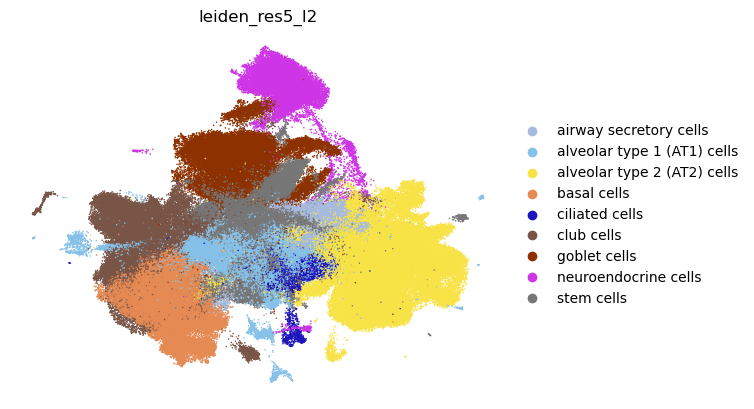

In [8]:
sc.pl.umap(adata, color='leiden_res5_l2', palette=cell_type_colors, frameon=False, size=5)

/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


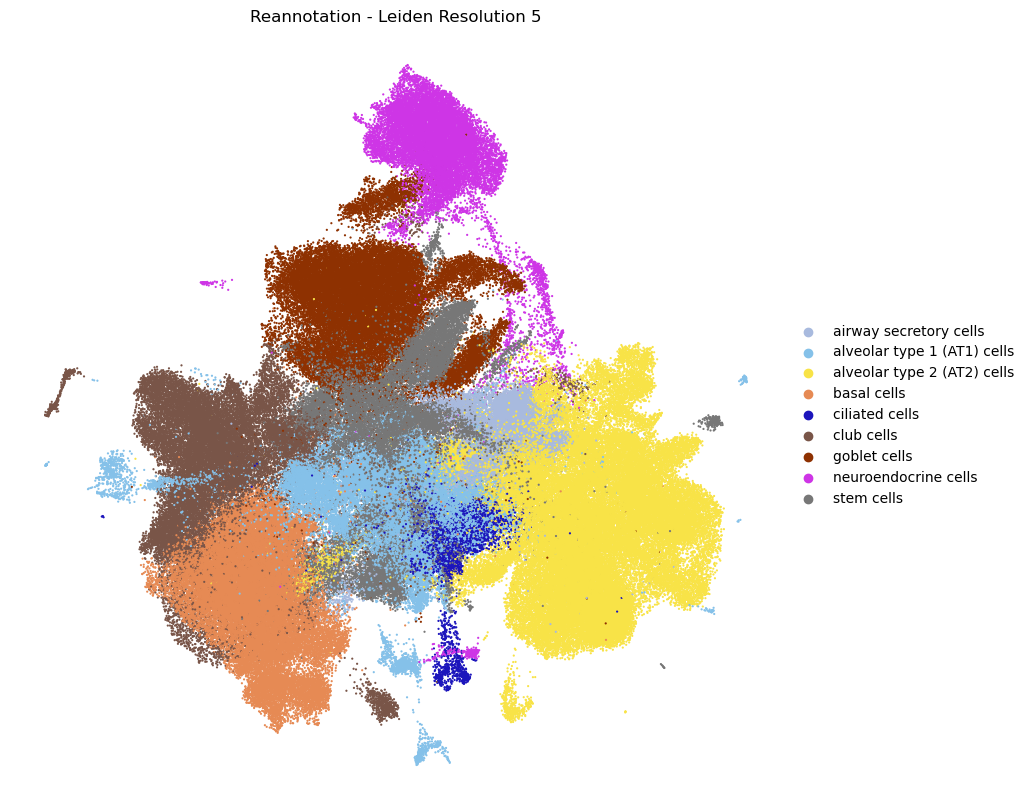

In [9]:

# Set figure size to be square
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed

# Create the UMAP plot
sc.pl.umap(adata, color='leiden_res5_l2', palette=cell_type_colors, frameon=False, size=10, title="Reannotation - Leiden Resolution 5", show=False, ax=ax)

# Ensure the plot has equal aspect ratio
ax.set_aspect('equal')

# Save the plot with higher resolution
plt.savefig("/home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/Leiden5.png", dpi=300, bbox_inches='tight')
plt.show()

/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


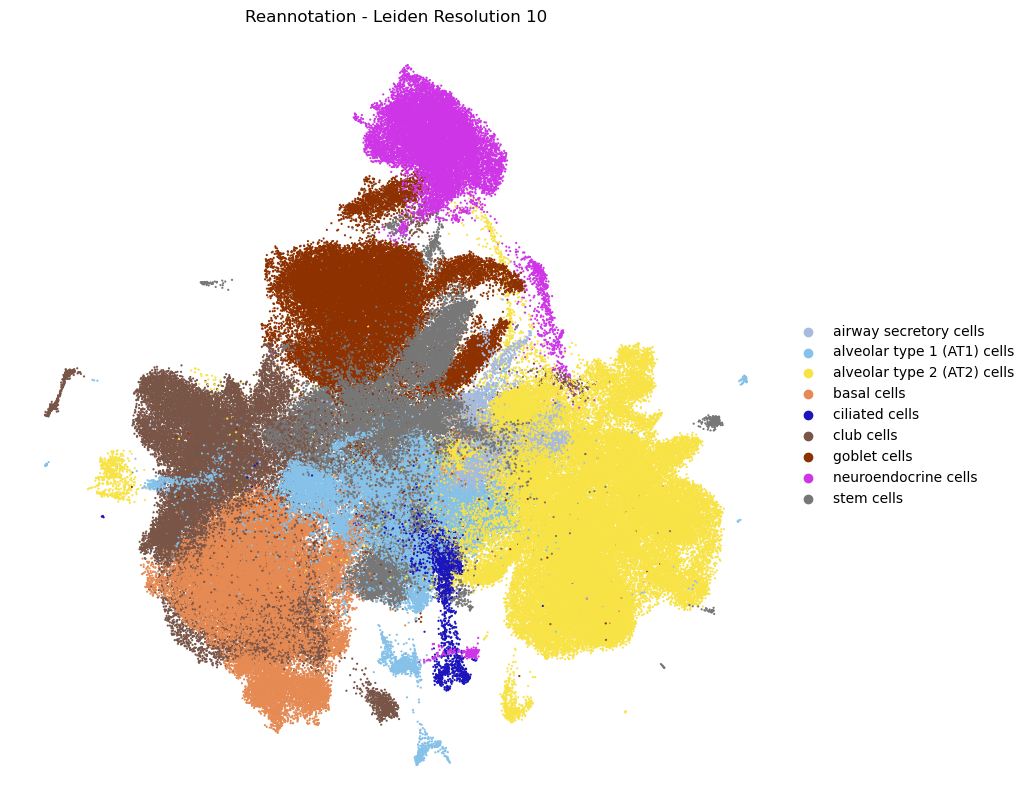

In [24]:

# Set figure size to be square
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed

# Create the UMAP plot
sc.pl.umap(adata, color='leiden_res10_l2', palette=cell_type_colors, frameon=False, size=10, title="Reannotation - Leiden Resolution 10", show=False, ax=ax)

# Ensure the plot has equal aspect ratio
ax.set_aspect('equal')

# Save the plot with higher resolution
plt.savefig("/home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/Leiden10.png", dpi=300, bbox_inches='tight')
plt.show()

/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


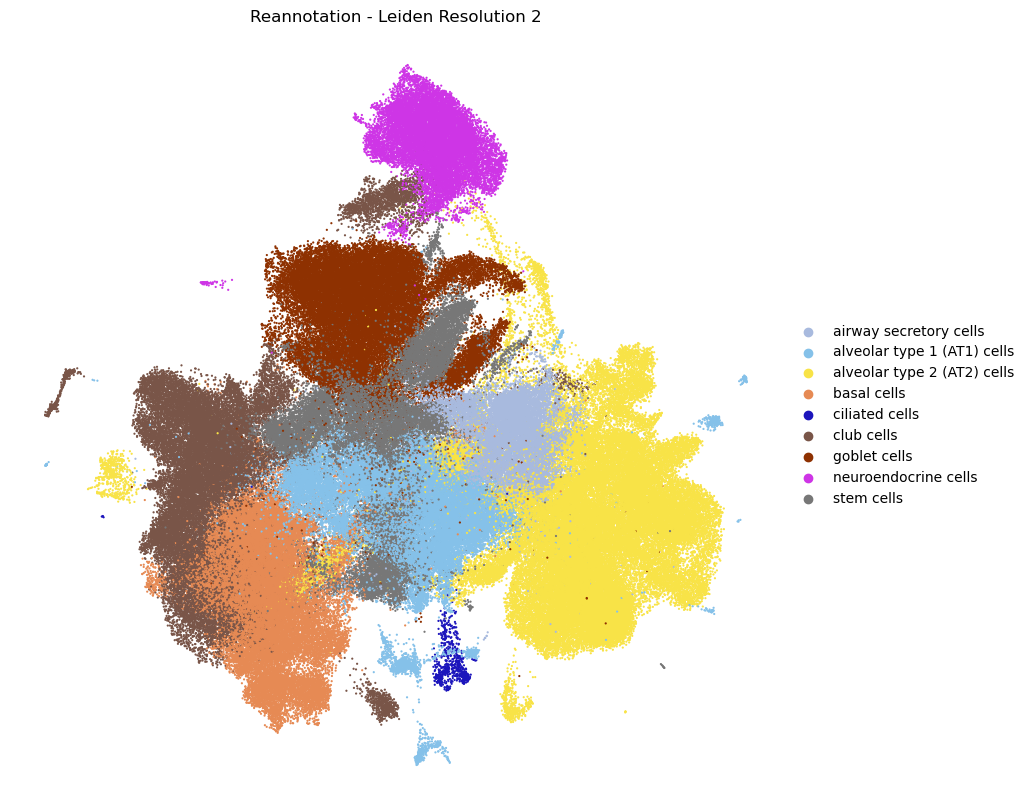

In [25]:

# Set figure size to be square
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed

# Create the UMAP plot
sc.pl.umap(adata, color='leiden_res2_l2', palette=cell_type_colors, frameon=False, size=10, title="Reannotation - Leiden Resolution 2", show=False, ax=ax)

# Ensure the plot has equal aspect ratio
ax.set_aspect('equal')

# Save the plot with higher resolution
plt.savefig("/home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/Leiden2.png", dpi=300, bbox_inches='tight')
plt.show()

In [33]:
adata

AnnData object with n_obs × n_vars = 225487 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined', 'leiden_res_2', 'leiden_res2_l2', 'leiden_res_5', 'leiden_res5_l2', 'leiden_res_10', 'leiden_res10_l2', 'leiden_res2_l3', 'leiden_res5_l3', 'leiden_res10_l3'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'leiden_res10_l3_colors', 'leiden_res2_l3_colors', 'leiden_res5_l3_colors', 'level_3_colors', 'neighbors', 'level_2_colors', 'leiden_res2_l2_

/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/icb/lennard.halle/miniconda3/envs/pdac/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


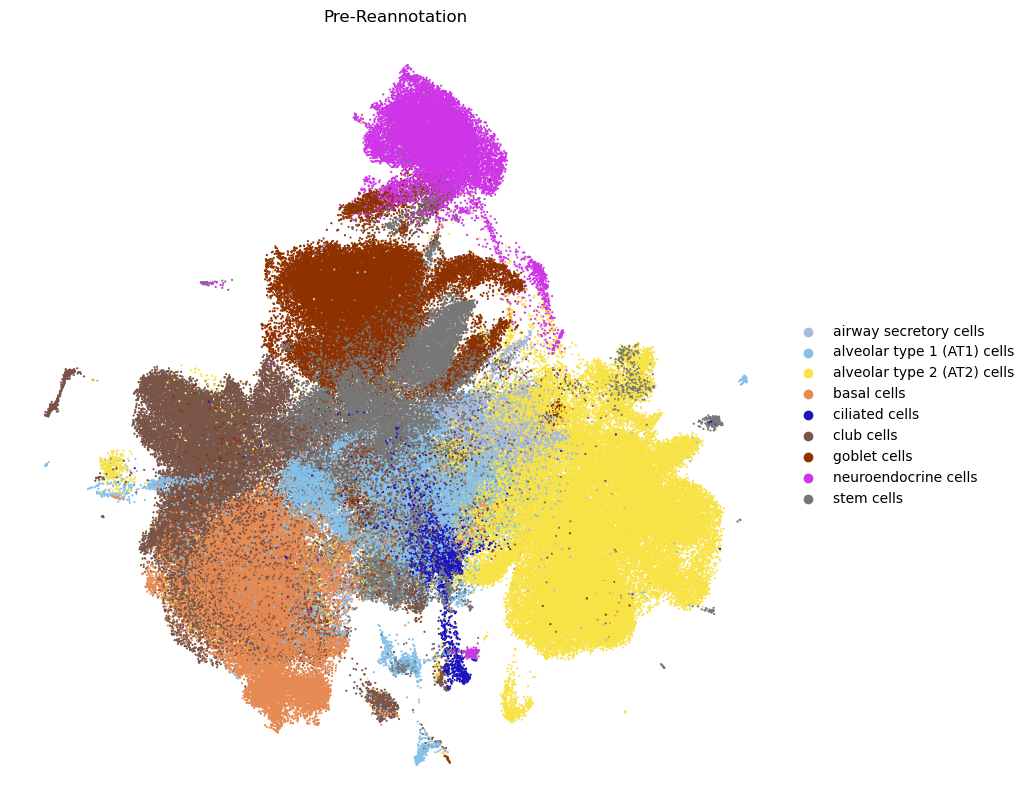

In [27]:

# Set figure size to be square
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed

# Create the UMAP plot
sc.pl.umap(adata, color='level_2', palette=cell_type_colors, frameon=False, size=10, title="Pre-Reannotation", show=False, ax=ax)

# Ensure the plot has equal aspect ratio
ax.set_aspect('equal')

# Save the plot with higher resolution
plt.savefig("/home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/pre_reannotation.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
import pandas as pd

df_asc = pd.crosstab(adata[adata.obs.derive == 'ASC'].obs['sample_id'], adata[adata.obs.derive == 'ASC'].obs['leiden_res5_l3'])
df_fsc = pd.crosstab(adata[adata.obs.derive == 'FSC'].obs['sample_id'], adata[adata.obs.derive == 'FSC'].obs['leiden_res5_l3'])
df_ips = pd.crosstab(adata[adata.obs.derive == 'IPS'].obs['sample_id'], adata[adata.obs.derive == 'IPS'].obs['leiden_res5_l3'])

In [39]:
df_asc_norm = df_asc.div(df_asc.sum(axis=1), axis=0)
df_fsc_norm = df_fsc.div(df_fsc.sum(axis=1), axis=0)
df_ips_norm = df_ips.div(df_ips.sum(axis=1), axis=0)

In [40]:
df_asc_norm_sort = df_asc_norm.sort_values(by=['stem cells'], ascending=False)
df_fsc_norm_sort = df_fsc_norm.sort_values(by=['stem cells'], ascending=False)
df_ips_norm_sort = df_ips_norm.sort_values(by=['stem cells'], ascending=False)

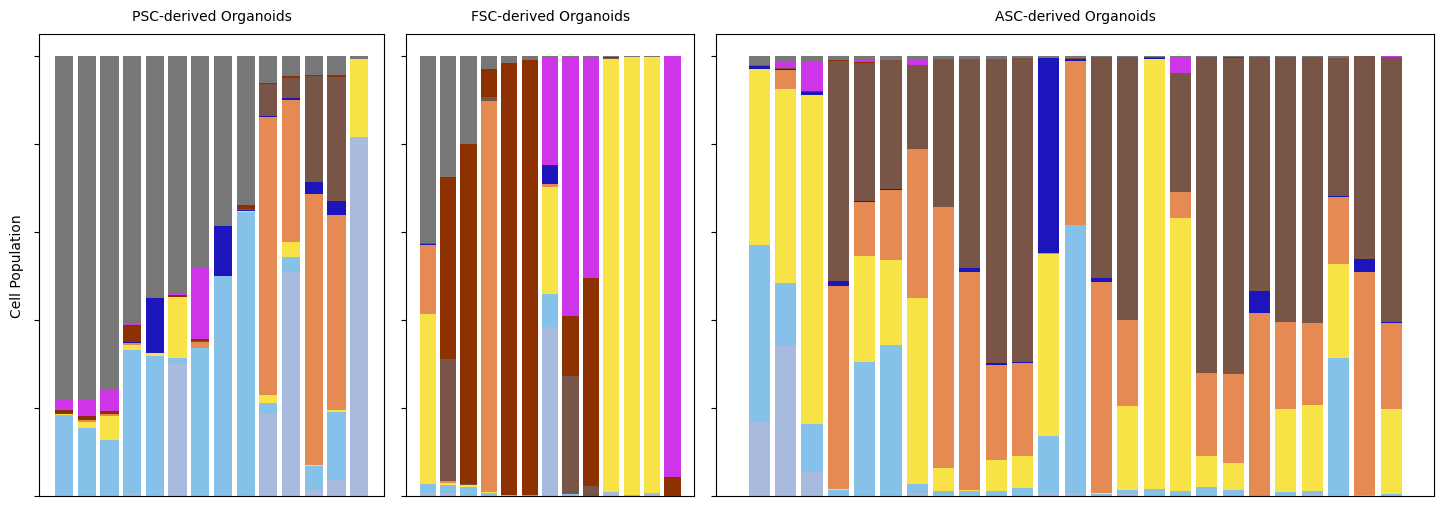

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True, gridspec_kw={'width_ratios': [1.2, 1, 2.5], 'wspace' : 0.05})

dfs = [df_ips_norm_sort,df_fsc_norm_sort, df_asc_norm_sort]

labels = ['PSC-derived Organoids','FSC-derived Organoids', 'ASC-derived Organoids', ]

for i, (df, label) in enumerate(zip(dfs, labels)):
    sample_ids = df.index

    cell_types = df.columns

    bottom = [0] * len(sample_ids)
    for cell_type in cell_types:
        counts = df[cell_type]
        axs[i].bar(sample_ids, counts, bottom=bottom, color=cell_type_colors[cell_type])
        bottom = [b + c for b, c in zip(bottom, counts)]

    axs[i].set_xticks([])
    axs[i].set_xticklabels([])
     
    axs[i].set_xlabel(label, labelpad=10)
    axs[i].xaxis.set_label_position('top')
    if i == 0:
        axs[i].set_ylabel('Cell Population')
    else:
        axs[i].set_yticklabels([]) 

plt.savefig('Stacked_Bar_Derived_Organoid.png')
plt.show()


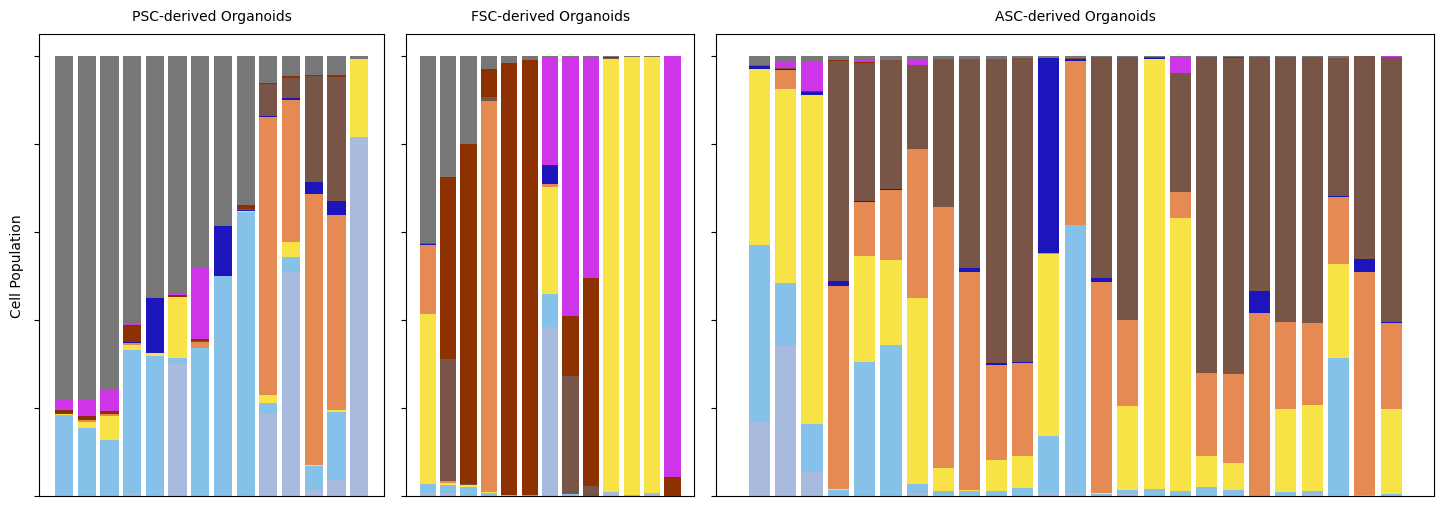

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True, gridspec_kw={'width_ratios': [1.2, 1, 2.5], 'wspace' : 0.05})

dfs = [df_ips_norm_sort,df_fsc_norm_sort, df_asc_norm_sort]

labels = ['PSC-derived Organoids','FSC-derived Organoids', 'ASC-derived Organoids', ]

for i, (df, label) in enumerate(zip(dfs, labels)):
    sample_ids = df.index

    cell_types = df.columns

    bottom = [0] * len(sample_ids)
    for cell_type in cell_types:
        counts = df[cell_type]
        axs[i].bar(sample_ids, counts, bottom=bottom, color=cell_type_colors[cell_type])
        bottom = [b + c for b, c in zip(bottom, counts)]

    axs[i].set_xticks([])
    axs[i].set_xticklabels([])
     
    axs[i].set_xlabel(label, labelpad=10)
    axs[i].xaxis.set_label_position('top')
    if i == 0:
        axs[i].set_ylabel('Cell Population')
    else:
        axs[i].set_yticklabels([]) 

plt.savefig('/home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/Stacked_barplot_recolored.pdf')
plt.show()


### Pseudotime plot

In [5]:
adata

AnnData object with n_obs × n_vars = 225487 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined', 'leiden_res_2', 'leiden_res2_l2', 'leiden_res_5', 'leiden_res5_l2', 'leiden_res_10', 'leiden_res10_l2', 'leiden_res2_l3', 'leiden_res5_l3', 'leiden_res10_l3'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'leiden_res10_l3_colors', 'leiden_res2_l3_colors', 'leiden_res5_l3_colors', 'level_3_colors', 'neighbors'
    obsm: 'X_scPoli', 'X_umap'
    

In [28]:
# Update the color dictionary in adata.uns
column_name = 'leiden_res5_l2'  # specify your column name
adata.uns[f'{column_name}_colors'] = cell_type_colors

# Verify the changes
print(adata.uns[f'{column_name}_colors'])


{'biliarysystem': '#A73030', 'intestine': '#91D1C2', 'liver': '#8F7700', 'lung': '#F39B7F', 'pancreas': '#DC0000', 'prostate': '#4A6990', 'salivarygland': '#3B3B3B', 'stomach': '#B09C85', 'thyroid': '#7E6148', 'epithelial': '#0073C2', 'mesenchymal': '#A3E3AF', 'stromal': '#A3E3AF', 'neural': '#111111', 'endothelial': '#CD534C', 'immune': '#C251A1', 'stem cells': '#777777', 'enterocytes': '#225805', 'stromal 2 (NPY)': '#E4B974', 'colonocytes': '#FFB300', 'goblet cells': '#8E3101', 'cycling stromal cells': '#47EDD1', 'Interstitial cells of Cajal (ICC)': '#F47A92', 'smooth muscle cells (SMC)': '#2D62A3', 'mesoderm 1 (HAND1)': '#9106EB', 'pericytes': '#573794', 'Microfold cells': '#F82745', 'mesoderm 2 (ZEB2)': '#6435E0', 'schwann cell': '#027FFE', 'basal cells': '#E68A54', 'ciliated cells': '#1C15BC', 'enteroendocrine cells': '#F7DC6F', 'mesothelial cells': '#7DCEA0', 'neuron': '#111111', 'tuft cells': '#9E018A', 'cycling endothelial cells': '#BDFD0B', 'stromal 1 (ADAMDEC1)': '#B22760', '

In [6]:
adata.obs['Root_Cell'] = 0

In [7]:
adata.obs.loc['AACGAAATCCGACGGT-1-158', 'Root_Cell'] = 1 

In [8]:
adata[adata.obs.Root_Cell == 1].obs.index

Index(['AACGAAATCCGACGGT-1-158'], dtype='object', name='cells')

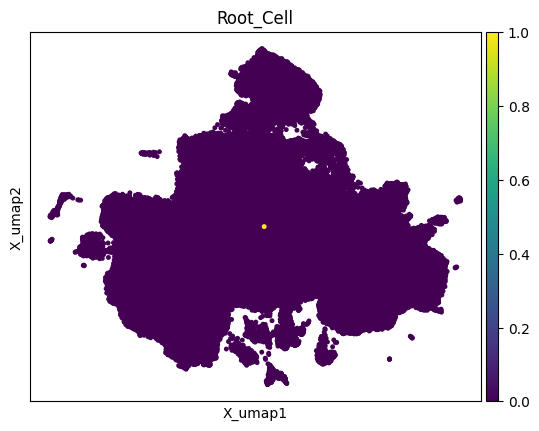

In [9]:
sc.pl.embedding(adata, basis='X_umap', color='Root_Cell', s=50)

In [12]:
import numpy as np

In [13]:
root_cell_index = np.flatnonzero(adata.obs['Root_Cell'] == 1)[0]

In [14]:
adata.uns['iroot'] = root_cell_index

In [15]:
sc.tl.dpt(adata)

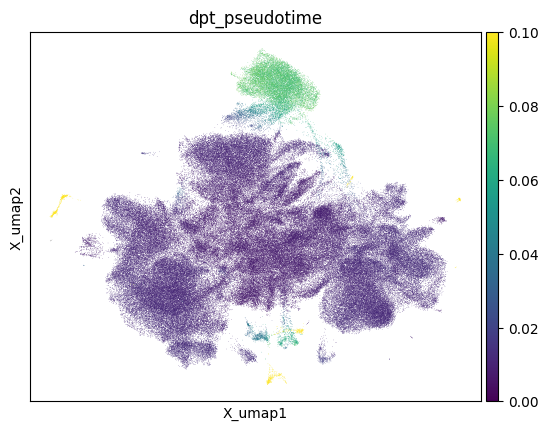

In [16]:
sc.pl.embedding(adata, basis='X_umap', color='dpt_pseudotime', color_map='viridis', vmax=0.1)

In [17]:
pk = cr.kernels.PseudotimeKernel(adata, time_key='dpt_pseudotime')

In [18]:
pk.compute_transition_matrix()

100%|██████████| 225487/225487 [00:51<00:00, 4397.48cell/s]


PseudotimeKernel[n=225487, dnorm=False, scheme='hard', frac_to_keep=0.3]

saving figure to file /home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/stream_plot.png


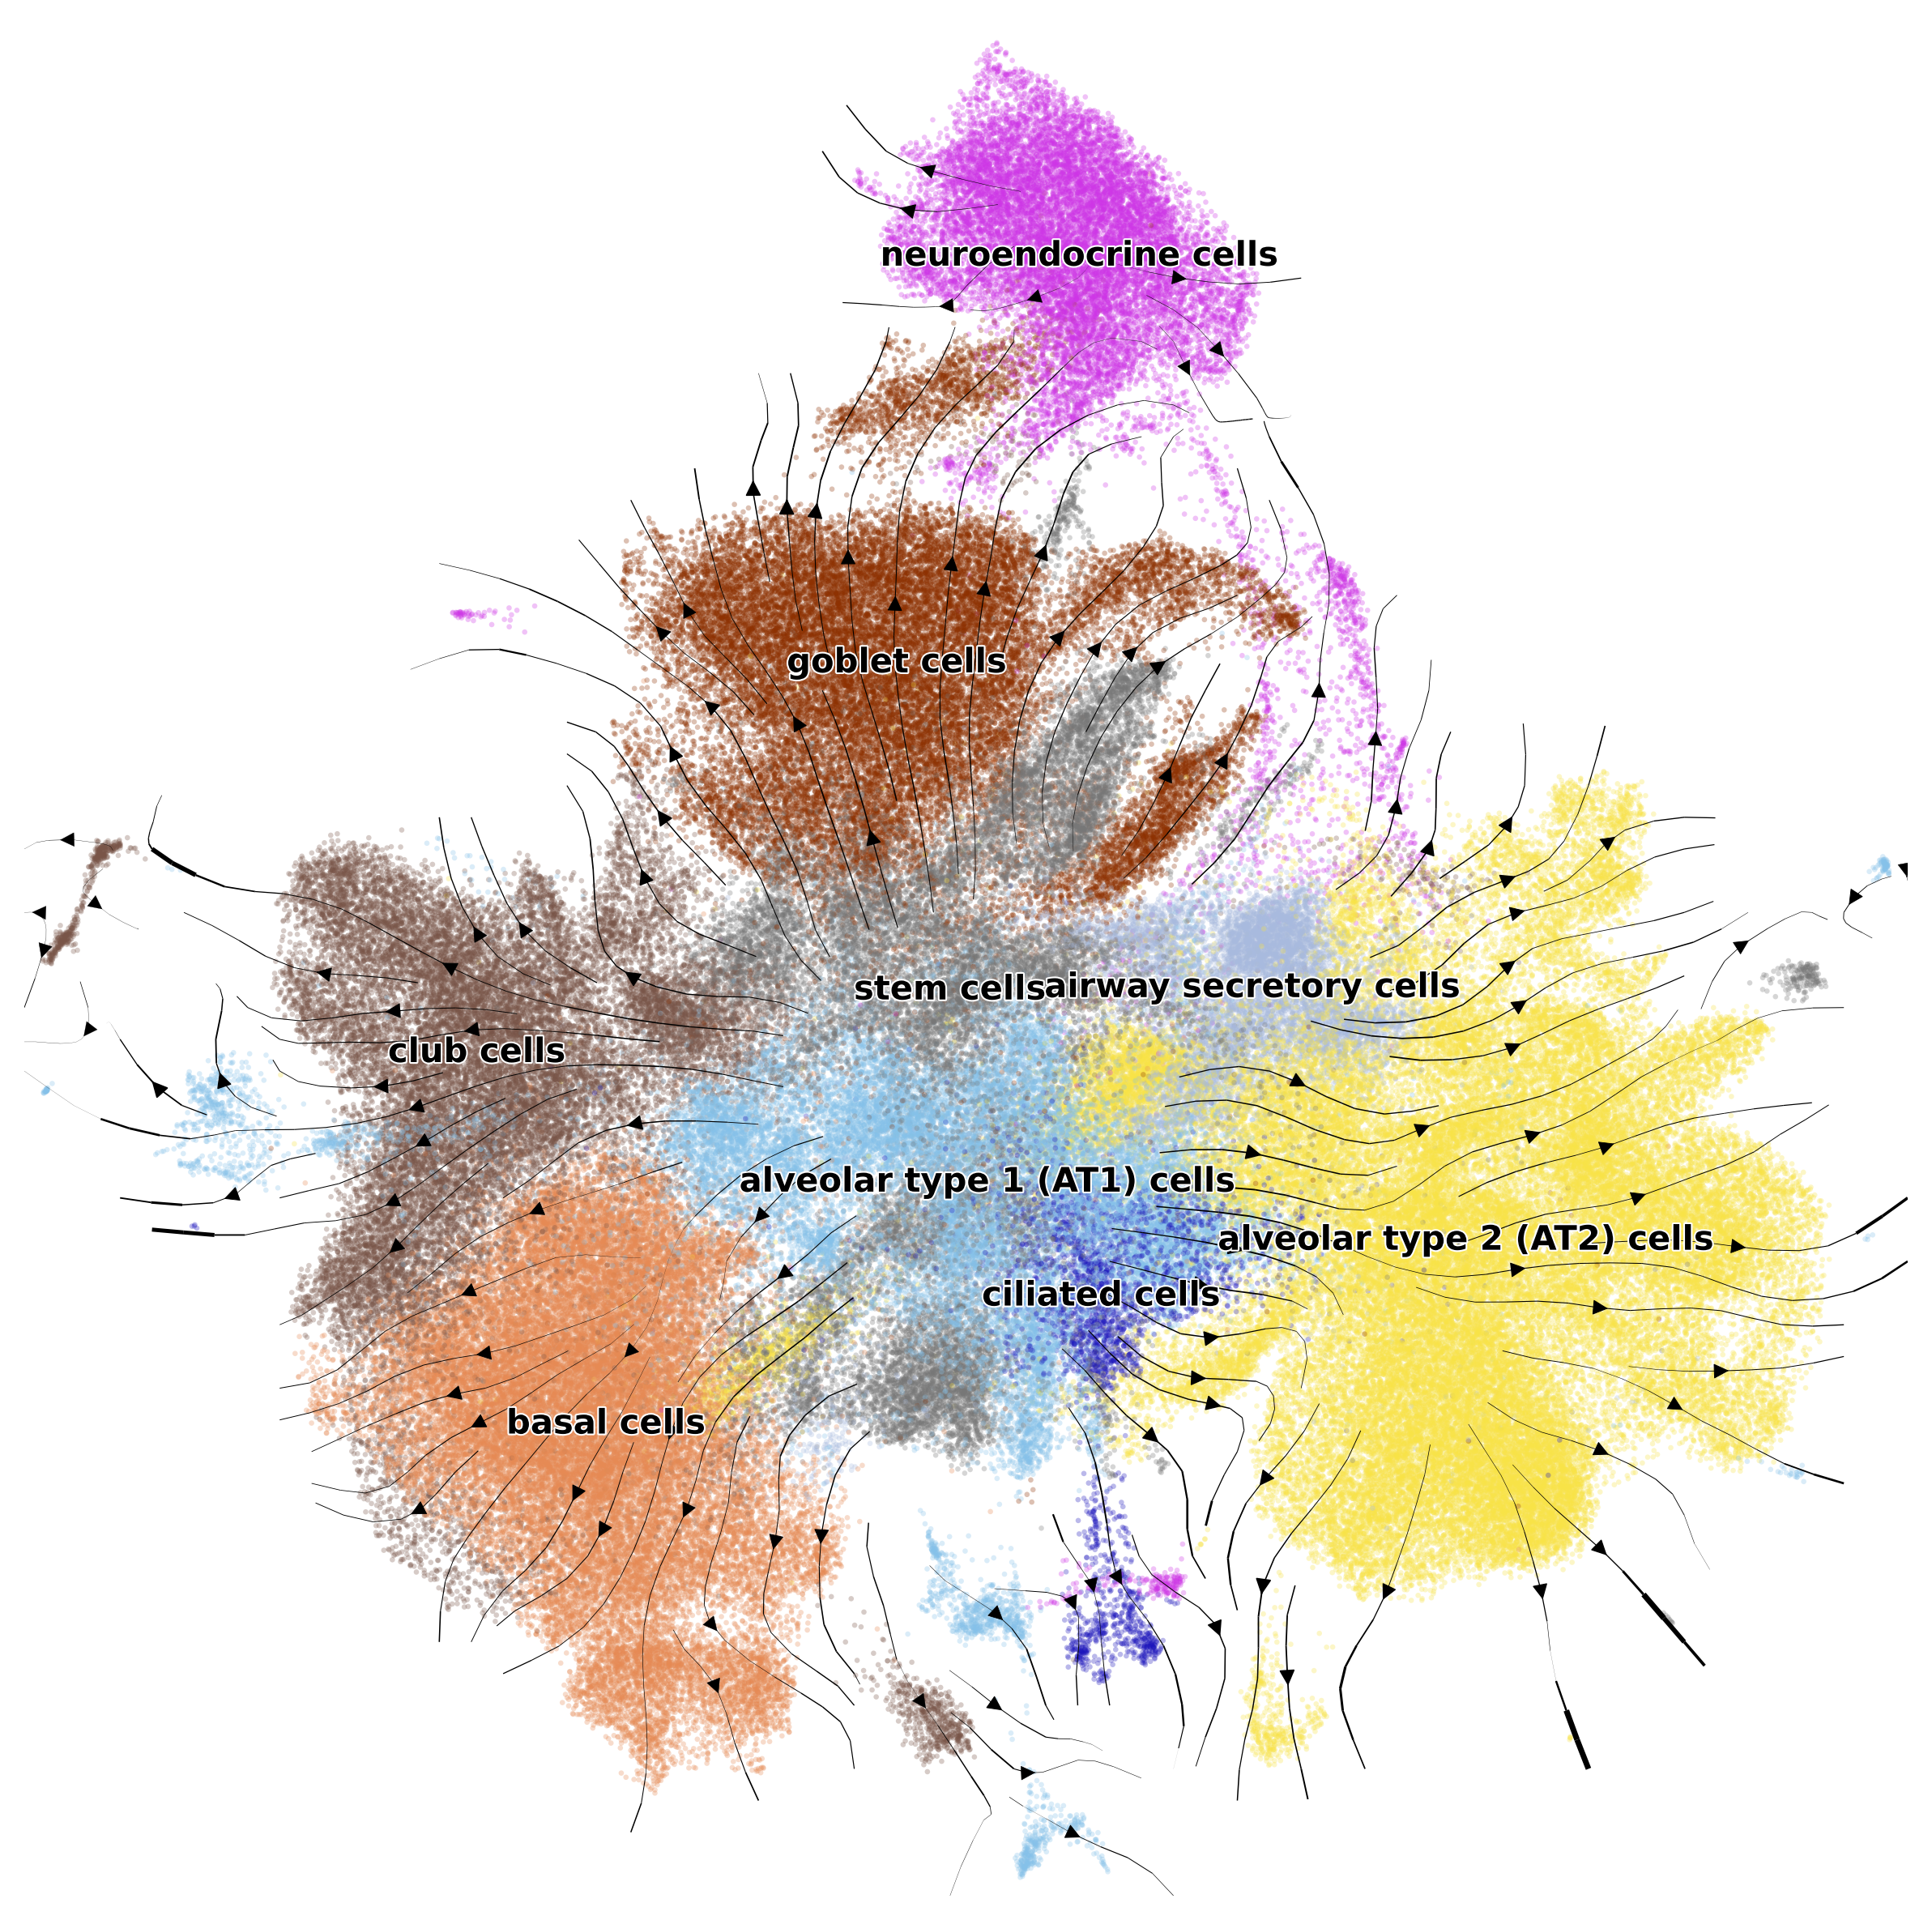

In [45]:
pk.plot_projection(basis='X_umap', color='leiden_res5_l2', size=10, connectivities=adata.obsp["connectivities"], title='', dpi=300, figsize=(10, 10), save="/home/icb/lennard.halle/link_to_lustre_projects/2024_HEOCA_revision_lennard.halle/Leiden_reclustering_plots/stream_plot.png", legend_loc=None)